# <center> <u> First Order Differential Equations </u> </center> 

## 1. <u> Euler Method </u>

#### - 

## 2. <u> Runge Kutta Method </u>

#### - 

## 3. <u> Forth Order Runge Kutta </u> 

#### - 

## 4. <u> Numerov Method </u> 

#### - 

In [1]:
import setuptools
%load_ext Cython

In [2]:
import numpy as np
from numba import jit 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (10, 5))

## <center> Simple Ordinary Differential Equation </center> 

## <center> $ \frac{dx}{dt} = \frac{2x}{t} $ </center> 

## <center> Separation of Variables </center> 

## <center> $ \frac{1}{2x} dx = \frac{1}{t} dt $ </center> 

## <center> $ \int \frac{1}{2x} dx = \int \frac{1}{t} dt$ </center> 

## <center> Analytical Solution </center>

## <center> $ \frac{1}{2} ln|x| + C_{1} = ln|t| + C_{2} $ </center> 

## <center> $ |x|^{\frac{1}{2}} = |t| \cdot e^{C} $ </center> 

## <center> $ x(t) = k \cdot t^{2} $ </center>

In [35]:
def func(k, t):
    """
    
    """
    
    return k * t**2

In [36]:
k = np.pi
t = np.linspace(0, 10, 10000)
my_func = func(k, t)

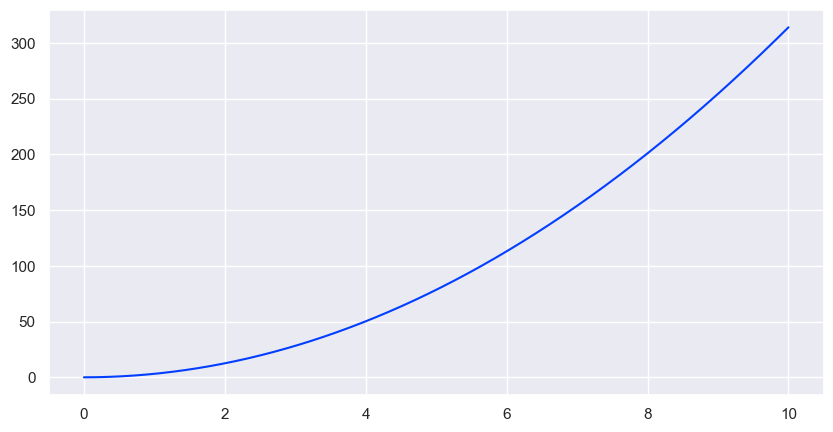

In [37]:
ax = sns.lineplot(
    x = t,
    y = my_func,
)

plt.show()

## <center> Taylor Series Expansion </center> 

## <center> $ x(t + h) = x(t) + h \frac{dx}{dt} + \frac{1}{2} h^{2} \frac{d^{2}x}{dt^{2}} $ </center> 

## <center> $ x(t + h) = x(t) + h f(x, t) + O(h^{2}) $ </center> 

## <center> Eulers Method </center> 

## <center> $ x(t + h) = x(t) + h f(x, t) $ </center> 

## <center> $ \frac{dx}{dt} = -x^{3} + sin(t) $ </center> 

In [5]:
%%cython -a
import numpy as np
cimport numpy as cnp

cdef extern from "math.h":
    cdef double sin(double x)
    cdef double pow(double x, int n)
    
cdef double f(double x, double t):
    """
    
    """
    
    return -pow(x, 3) + sin(t)

cpdef cnp.ndarray[dtype = cnp.double_t, ndim = 1] differential_equation_cython():
    """
    
    """
    cdef int N = 100000;
    cdef double x = 0.0;
    cdef double h = 0.0001;
    cdef double t = h; 
        
    cdef cnp.ndarray[double] euler = np.zeros(N, dtype = np.double);
    euler[0] = 0;
    
    cdef int i = 1;
    for i in range(1, N):
        euler[i] = euler[i-1] + h * f(euler[i-1], t);
        t = t + h;
    
    return euler;

cython = differential_equation_cython()

In [6]:
%timeit differential_equation_cython()

4.08 ms ± 30.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
@jit(nopython = True)
def f(x, t):
    """
    
    """
    
    return -x**3 + np.sin(t)

@jit(nopython = True)
def differential_equation_numba():
    """
    
    """

    N = 100000
    x = 0
    h = 0.0001
    t = h
    
    euler = np.zeros(N)
    euler[0] = 0
    
    for i in range(1, N):
        euler[i] = euler[i-1] + h * f(euler[i-1], t)
        t += h
    
    return euler

numba = differential_equation_numba()

In [8]:
%timeit differential_equation_numba()

689 µs ± 4.68 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
t = np.linspace(0, 10, 100000)

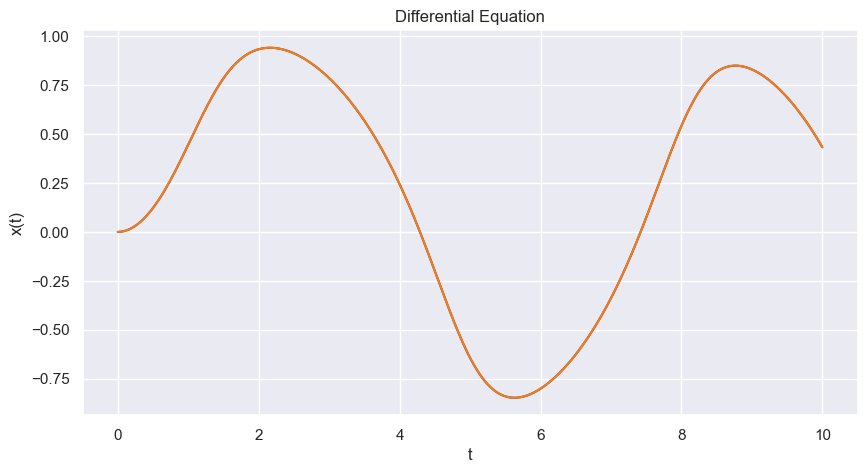

In [12]:
ax = sns.lineplot(
    x = t,
    y = numba,
)

sns.lineplot(
    x = t,
    y = cython,
)

ax.set(
    title = "Differential Equation",
    xlabel = "t",
    ylabel = "x(t)",
)

plt.show()

## <center> Analytical Solution </center> 

## <center> $ \frac{dx}{dt} = -x^{3} + sin(t) $ </center> 

## <center> $ x^{3} dx = sin(t) dt $ </center> 

## <center> $ \int x^{3} dx = \int sin(t) dt $ </center> 

## <center> $ \frac{x^{4}}{4} = -cos(t) $ </center> 

## <center> $ x = -4cos(t) $ </center> 

In [ ]:
def analytical_solution(t):
    """
    
    """
    
    
    
    return 0

## <center> Eulers Method Error Analysis </center> 

## <center> $ \sum_{k=0}^{N-1} \frac{1}{2} h^{2} (\frac{d^{2}x}{dt^{2}}) = \frac{1}{2} h \sum_{k=0}^{N-1} h (\frac{df}{dt}) \approx \frac{1}{2} h \int_{a}^{b} \frac{df}{dt} dt$ </center> 

## <center> $ \frac{1}{2} h [f(x(b), b) - f(x(a), a)]$ </center>

## <center> Runge Kutta Method </center> 

## <center> $ x(t + h) = x(t + \frac{h}{2}) + \frac{1}{2} h (\frac{dx}{dt}) + \frac{1}{8} h^{2} (\frac{d^{2}x}{dt^{2}}) $ </center> 

## <center> $ x(t) = x(t + \frac{h}{2}) - \frac{1}{2} h (\frac{dx}{dt}) + \frac{1}{8} h^{2} (\frac{d^{2}x}{dt^{2}}) $ </center>

## <center> $ x(t + h) = x(t) + hf(x(t + \frac{h}{2}), t + \frac{h}{2}) $ </center>

In [29]:
@jit(nopython = True)
def f(x, t):
    """
    
    """
    
    return -x**3 + np.sin(t)

@jit(nopython = True)
def differential_equation_numba():
    """
    
    """

    N = 10000
    x = 0
    h = 0.001
    t = h
    
    runge_kutta = np.zeros(N)
    runge_kutta[0] = 0
    
    for i in range(1, N):
        k1 = h * f(runge_kutta[i-1], t)
        k2 = h * f(runge_kutta[i-1] + k1 / 2, t + h / 2)
        runge_kutta[i] = runge_kutta[i-1] + k2
        t += h
    
    return runge_kutta

numba = differential_equation_numba()

In [30]:
%timeit differential_equation_numba()

141 µs ± 711 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [33]:
t = np.linspace(0, 10, 10000)

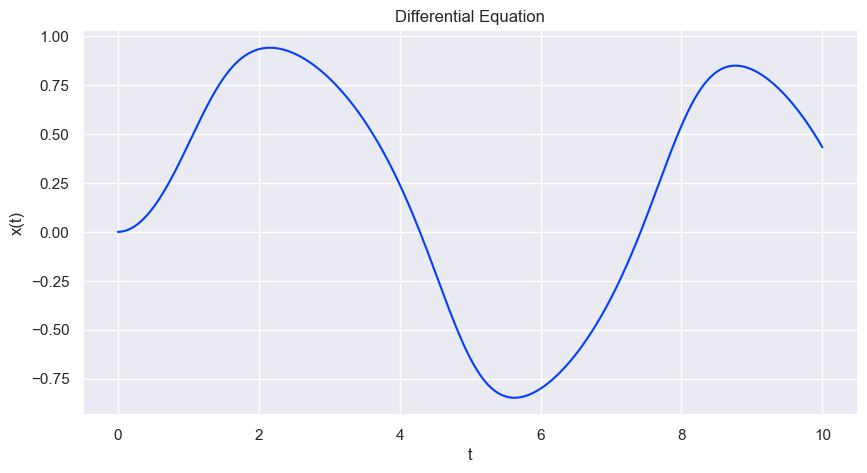

In [34]:
ax = sns.lineplot(
    x = t,
    y = numba,
)

ax.set(
    title = "Differential Equation",
    xlabel = "t",
    ylabel = "x(t)",
)

plt.show()

## <center> Runge Kutta Error Analysis </center> 